# Figure 5e

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import itertools
import scipy.stats
import matplotlib
import tqdm
#matplotlib.rc('text', usetex=True)

In [2]:
dataPath = '../generatedData/fig5/'

In [3]:
w = np.load(dataPath + 'original.npz')['weights']

In [4]:
conn = np.load(dataPath+'original.npz')["connectivity"]

In [5]:
first = True
dists = {'none': [], 'cols': [], 'rows': [], 'ind': []}
corrs = {'none': [], 'cols': [], 'rows': [], 'ind': []}
eCorrs = {'none': [], 'cols': [], 'rows': [], 'ind': []}
iCorrs = {'none': [], 'cols': [], 'rows': [], 'ind': []}
for p in tqdm.tqdm(itertools.permutations(range(4)), "Calculating correlations", total=4*3*2*1):
    if first:
        first = False
        continue
    #print(p)
    for k in dists.keys():
        wprime = np.load(dataPath+'%s_%d%d%d%d.npz' % ((k,)+p))['weights']
        d = np.sqrt(np.sum((wprime-w)**2))
        dists[k].append(d)
        c = scipy.stats.pearsonr(w[conn!=0].flat, wprime[conn!=0].flat)[0]
        corrs[k].append(c)
        c = scipy.stats.pearsonr(w[conn==1].flat, wprime[conn==1].flat)[0]
        eCorrs[k].append(c)
        c = scipy.stats.pearsonr(w[conn==-1].flat, wprime[conn==-1].flat)[0]
        iCorrs[k].append(c)

Calculating correlations: 100%|██████████| 24/24 [07:59<00:00, 19.47s/it]


In [6]:
seaborn.set_context("paper")
seaborn.set_style("white")

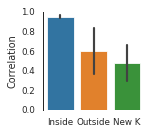

In [7]:
plt.figure(figsize=(1.8,1.8))
seaborn.barplot(data=[corrs['cols'], corrs['rows'], corrs['ind']], ci='sd')
plt.xticks(range(3), ["Inside", "Outside", "New K"])
#plt.xlabel("Change")
plt.ylim(0,1)
plt.ylabel("Correlation")
seaborn.despine(bottom=True)
#plt.savefig("fig5_parts/perturbation.svg", dpi=300)
plt.show()

# Alternate versions of Fig 5e

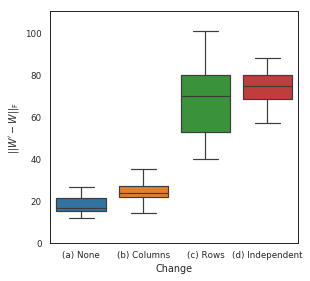

In [8]:
plt.figure(figsize=(4.4,4))
#dists['ind'] at index 18 did not converge properly and has been excluded
seaborn.boxplot(data=[dists['none'], dists['cols'], dists['rows'], dists['ind'][:18]+dists['ind'][19:]], whis=2.0)
plt.xticks(range(4), ["(a) None", "(b) Columns", "(c) Rows", "(d) Independent"])
plt.xlabel("Change")
plt.ylim(0,110)
plt.ylabel("$||W' - W||_\mathrm{F}$")
plt.tight_layout()
plt.show()
#plt.show()
#plt.savefig('../figures/perm_distance.tiff', dpi=300, transparent=False, frameon=False, )

/home/emil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


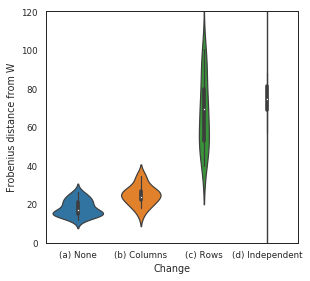

In [9]:
plt.figure(figsize=(4.4,4))
seaborn.violinplot(data=[dists['none'], dists['cols'], dists['rows'], dists['ind']])
plt.xticks(range(4), ["(a) None", "(b) Columns", "(c) Rows", "(d) Independent"])
plt.xlabel("Change")
plt.ylim(0,120)
plt.ylabel("Frobenius distance from W")
plt.tight_layout()
plt.show()
#plt.savefig('../figures/perm_distance.tiff', dpi=300, transparent=False, frameon=False)

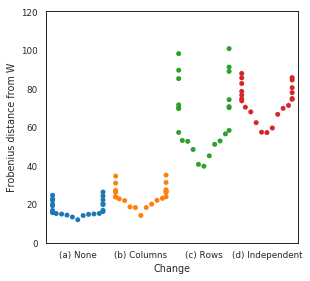

In [10]:
plt.figure(figsize=(4.4,4))
seaborn.swarmplot(data=[dists['none'], dists['cols'], dists['rows'], dists['ind']])
plt.xticks(range(4), ["(a) None", "(b) Columns", "(c) Rows", "(d) Independent"])
plt.xlabel("Change")
plt.ylim(0,120)
plt.ylabel("Frobenius distance from W")
plt.tight_layout()
plt.show()
#plt.savefig('../figures/perm_distance.tiff', dpi=300, transparent=False, frameon=False)

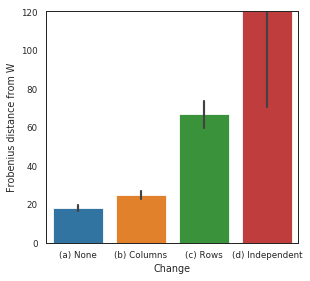

In [11]:
plt.figure(figsize=(4.4,4))
seaborn.barplot(data=[dists['none'], dists['cols'], dists['rows'], dists['ind']])
plt.xticks(range(4), ["(a) None", "(b) Columns", "(c) Rows", "(d) Independent"])
plt.xlabel("Change")
plt.ylim(0,120)
plt.ylabel("Frobenius distance from W")
plt.tight_layout()
plt.show()
#plt.savefig('../figures/perm_distance.tiff', dpi=300, transparent=False, frameon=False)

## Statistical tests

In [12]:
scipy.stats.ttest_rel(corrs['rows'], corrs['ind'], )

Ttest_relResult(statistic=1.6063055724940751, pvalue=0.12246609074921286)

In [13]:
scipy.stats.ttest_rel(corrs['cols'], corrs['rows'])

Ttest_relResult(statistic=6.9110188725971575, pvalue=6.122006678961594e-07)

In [14]:
scipy.stats.wilcoxon(corrs['cols'], corrs['rows'])

WilcoxonResult(statistic=0.0, pvalue=2.7015948487105512e-05)

## Even more alternate versions

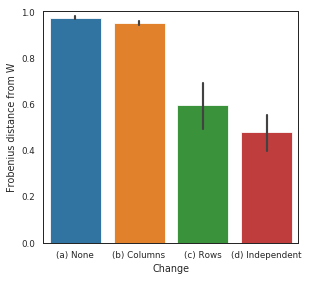

In [15]:
plt.figure(figsize=(4.4,4))
seaborn.barplot(data=[corrs['none'], corrs['cols'], corrs['rows'], corrs['ind']])
plt.xticks(range(4), ["(a) None", "(b) Columns", "(c) Rows", "(d) Independent"])
plt.xlabel("Change")
plt.ylim(0,1)
plt.ylabel("Frobenius distance from W")
plt.tight_layout()
plt.show()

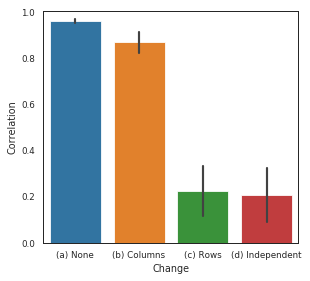

In [16]:
plt.figure(figsize=(4.4,4))
seaborn.barplot(data=[eCorrs['none'], eCorrs['cols'], eCorrs['rows'], eCorrs['ind']], ci='sd')
plt.xticks(range(4), ["(a) None", "(b) Columns", "(c) Rows", "(d) Independent"])
plt.xlabel("Change")
plt.ylim(0,1)
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

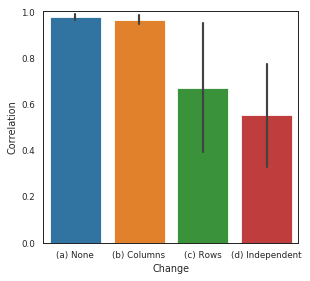

In [17]:
plt.figure(figsize=(4.4,4))
seaborn.barplot(data=[iCorrs['none'], iCorrs['cols'], iCorrs['rows'], iCorrs['ind']], ci='sd')
plt.xticks(range(4), ["(a) None", "(b) Columns", "(c) Rows", "(d) Independent"])
plt.xlabel("Change")
plt.ylim(0,1)
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()